In [1]:
from datetime import date
from pathlib import Path
import sqlite3

import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Define the paths
current_dir = Path(__file__).parent if "__file__" in locals() else Path.cwd()
database_path = current_dir / "sales.db"
output_dir = current_dir / "output"

# Create the output directory and its parent directory if they do not exist
output_dir.mkdir(parents=True, exist_ok=True)

# Total Sales By Month

In [4]:
# Create a connection to the database
conn = sqlite3.connect(database_path)

In [16]:
# Execute the query and load results into a Pandas DataFrame
query = '''
SELECT sale_date, SUM(total_price) as total_sales
FROM sales
GROUP BY sale_date
ORDER BY sale_date ASC
'''
df = pd.read_sql_query(query, conn)
print(df)

      sale_date  total_sales
0    2022-01-01          630
1    2022-01-02          440
2    2022-01-03          300
3    2022-01-04          340
4    2022-01-05         2070
..          ...          ...
335  2022-12-27          180
336  2022-12-28         2430
337  2022-12-29          675
338  2022-12-30          350
339  2022-12-31          480

[340 rows x 2 columns]


In [17]:
# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sale_date    340 non-null    object
 1   total_sales  340 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


In [18]:
# Convert sale_date to datetime
df['sale_date'] = pd.to_datetime(df['sale_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sale_date    340 non-null    datetime64[ns]
 1   total_sales  340 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.4 KB


In [19]:
# Set the sale_date column as the index
df = df.set_index('sale_date')
df.head(10)

,total_sales
sale_date,
2022-01-01,630
2022-01-02,440
2022-01-03,300
2022-01-04,340
2022-01-05,2070
2022-01-06,560
2022-01-07,2075
2022-01-08,445
2022-01-09,1405


In [20]:
# Resample the data to a monthly frequency and compute the sum
df_monthly = df.resample('M').sum()
df_monthly

,total_sales
sale_date,
2022-01-31,21565
2022-02-28,21295
2022-03-31,19190
2022-04-30,20020
2022-05-31,25935
2022-06-30,23715
2022-07-31,22560
2022-08-31,24190
2022-09-30,22105


In [21]:
# Map the month number to short month name
df_monthly['month_name'] = df_monthly.index.strftime('%b')
df_monthly

,total_sales,month_name
sale_date,,
2022-01-31,21565,Jan
2022-02-28,21295,Feb
2022-03-31,19190,Mar
2022-04-30,20020,Apr
2022-05-31,25935,May
2022-06-30,23715,Jun
2022-07-31,22560,Jul
2022-08-31,24190,Aug
2022-09-30,22105,Sep


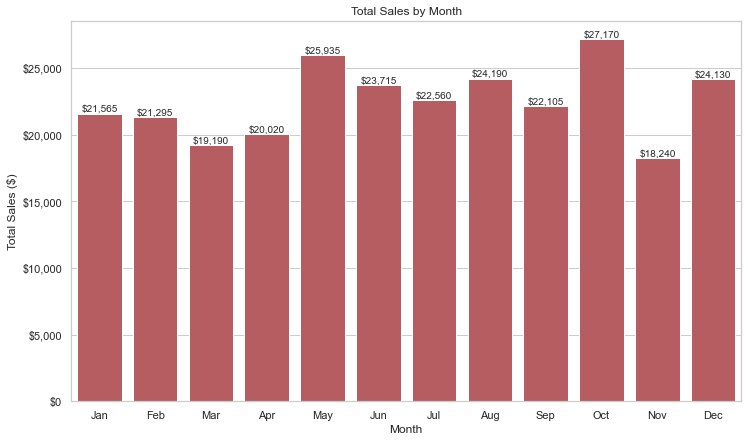

In [30]:
import seaborn as sns


# Set the style
sns.set(style="whitegrid")

# Create the bar chart using seaborn
plt.figure(figsize=(12, 7))  # Increased height for labels
sns.barplot(x='month_name', y='total_sales', data=df_monthly, color='r')

# Add data labels
for i, value in enumerate(df_monthly['total_sales']):
    plt.text(i, value, f"${value:,}", ha='center', va='bottom', fontsize=10)

# Set title and labels
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

# Save the plot as a PNG image
plt.savefig('monthly_sales.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [31]:
#Clearly in Oct month has maximum sales

# Total Sales By Product

In [32]:
# Execute the query and load results into a Pandas DataFrame
query = '''
SELECT p.product_name, SUM(s.total_price) as total_sales
FROM sales s
JOIN products p ON s.product_id = p.product_id
GROUP BY p.product_name
'''
df = pd.read_sql_query(query, conn)
df

,product_name,total_sales
0,Product A,59000
1,Product B,27525
2,Product C,80850
3,Product D,39560
4,Product E,63180


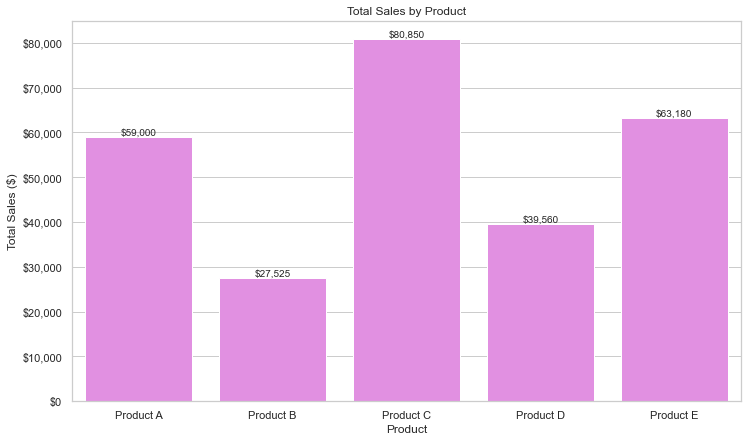

In [36]:

# Set the style
sns.set(style="whitegrid")

# Create the bar chart using seaborn
plt.figure(figsize=(12, 7))  # Increased height for labels
sns.barplot(x='product_name', y='total_sales', data=df, color='violet')

# Add data labels
for i, value in enumerate(df['total_sales']):
    plt.text(i, value, f"${value:,}", ha='center', va='bottom', fontsize=10)

# Set title and labels
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

# Save the plot as a PNG image
plt.savefig('product_sales.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


# Top Customers By Sales

In [40]:
# Execute the query and load results into a Pandas DataFrame
query = '''
SELECT c.first_name || ' ' || c.last_name as customer_name, SUM(s.total_price) as total_sales
FROM sales s
JOIN customers c ON s.customer_id = c.customer_id
GROUP BY customer_name
ORDER BY total_sales DESC
'''
df_c = pd.read_sql_query(query, conn)
df_c

,customer_name,total_sales
0,John Doe,31400
1,Jane Doe,30965
2,Bob Smith,30270
3,Alice Jones,28090
4,Emily Davis,26425
5,Frank Wilson,26135
6,Henry Chen,25395
7,Grace Lee,25355
8,Isabel Garcia,23265
9,David Brown,22815


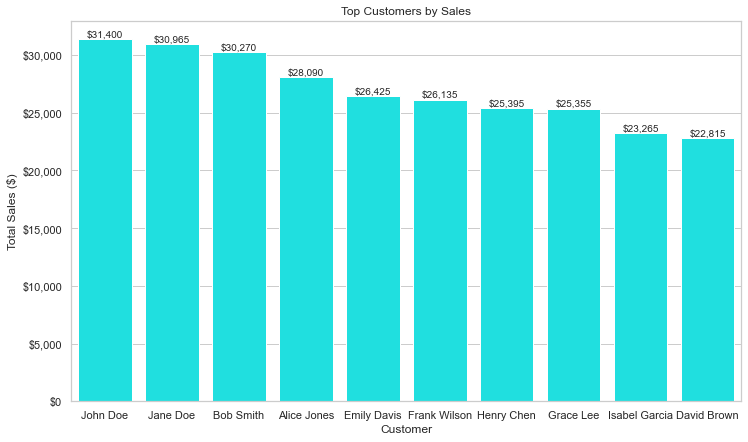

In [41]:
# Set the style
sns.set(style="whitegrid")

# Create the bar chart using seaborn
plt.figure(figsize=(12, 7))  # Increased height for labels
sns.barplot(x='customer_name', y='total_sales', data=df_c, color='cyan')

# Add data labels
for i, value in enumerate(df['total_sales']):
    plt.text(i, value, f"${value:,}", ha='center', va='bottom', fontsize=10)

# Set title and labels
plt.title('Top Customers by Sales')
plt.xlabel('Customer')
plt.ylabel('Total Sales ($)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

# Save the plot as a PNG image
plt.savefig('product_sales.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


# Product Performance Analysis

In [55]:
query = '''SELECT
    p.product_name,
    strftime('%Y-%m', s.sale_date) AS sales_period,
    AVG(s.total_price) AS average_sales
FROM
    sales s
JOIN
    products p ON s.product_id = p.product_id
GROUP BY
    p.product_name, sales_period
ORDER BY
    p.product_name, sales_period;
'''
df_avg = pd.read_sql_query(query, conn)
df_avg

,product_name,sales_period,average_sales
0,Product A,2022-01,260.526316
1,Product A,2022-02,286.842105
2,Product A,2022-03,330.000000
3,Product A,2022-04,276.190476
4,Product A,2022-05,263.888889
5,Product A,2022-06,292.105263
6,Product A,2022-07,263.157895
7,Product A,2022-08,259.090909
8,Product A,2022-09,306.666667
9,Product A,2022-10,273.333333


In [56]:
df_avg.info()
# df_avg['month_name'] = df_avg.index.strftime('%b')
# df_avg

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_name   60 non-null     object 
 1   sales_period   60 non-null     object 
 2   average_sales  60 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.5+ KB


In [57]:
# Convert sales_period to datetime
df_avg['sales_period'] = pd.to_datetime(df_avg['sales_period'])
df_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   product_name   60 non-null     object        
 1   sales_period   60 non-null     datetime64[ns]
 2   average_sales  60 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.5+ KB


In [68]:
# Add a new 'month' column
from calendar import month_abbr
df_avg['sales_period'] = pd.to_datetime(df_avg['sales_period'])

# Add a new 'month' column
df_avg['month'] = df_avg['sales_period'].apply(lambda x: month_abbr[x.month])
df_avg

,product_name,sales_period,average_sales,month
0,Product A,2022-01-01,260.526316,Jan
1,Product A,2022-02-01,286.842105,Feb
2,Product A,2022-03-01,330.000000,Mar
3,Product A,2022-04-01,276.190476,Apr
4,Product A,2022-05-01,263.888889,May
5,Product A,2022-06-01,292.105263,Jun
6,Product A,2022-07-01,263.157895,Jul
7,Product A,2022-08-01,259.090909,Aug
8,Product A,2022-09-01,306.666667,Sep
9,Product A,2022-10-01,273.333333,Oct


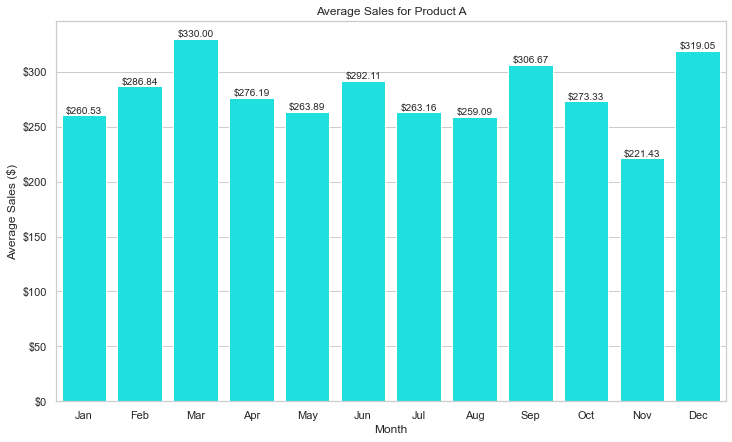

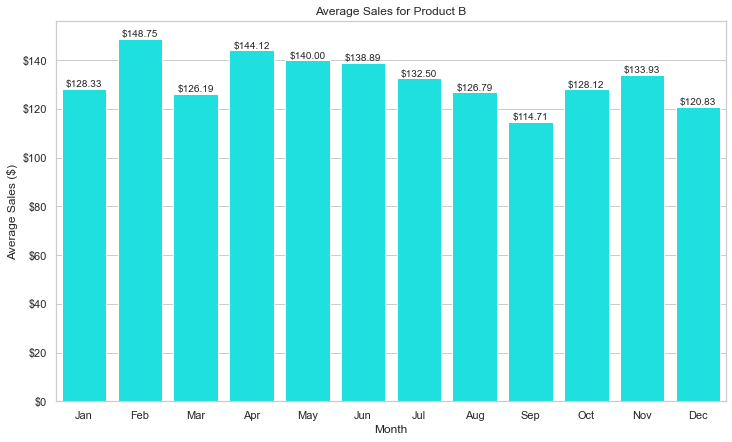

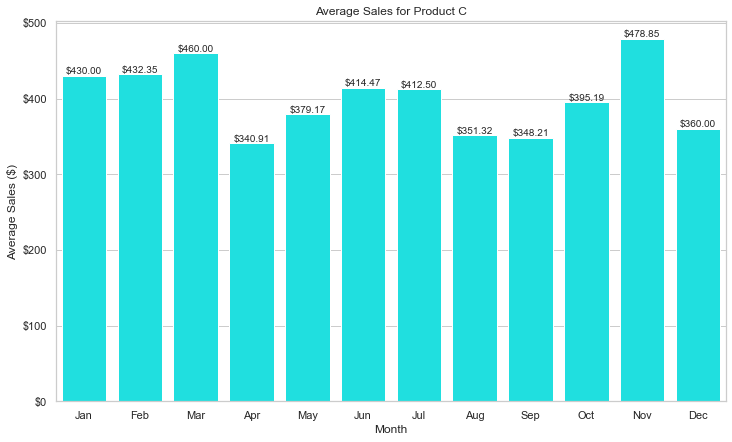

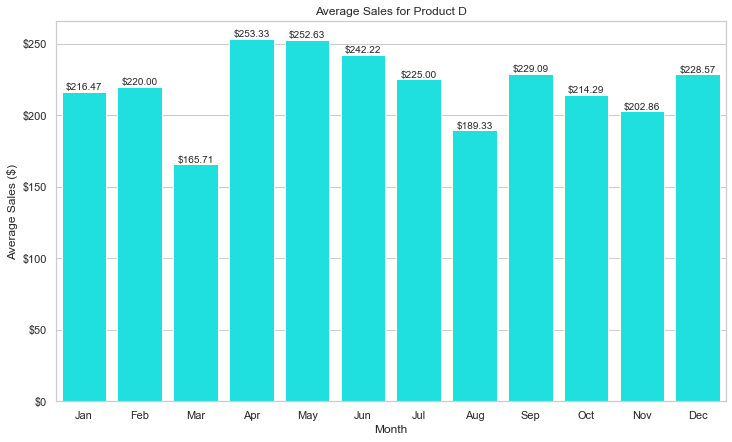

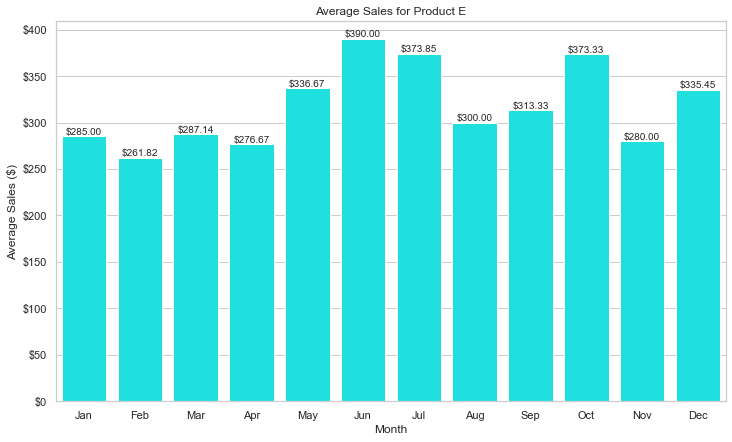

In [75]:
# List of unique product names
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique product names
products = df_avg['product_name'].unique()

# Loop through each product and create a separate bar chart
for product in products:
    product_data = df_avg[df_avg['product_name'] == product]
    sns.set(style="whitegrid")

    # Create a new figure and axis for each product's chart
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(x='month', y='average_sales', data=product_data, color='cyan')  # Use product_data here

    # Add data labels
    for i, value in enumerate(product_data['average_sales']):  # Use product_data here
        ax.text(i, value, f"${value:.2f}", ha='center', va='bottom', fontsize=10)

    # Set title and labels for the specific product's chart
    plt.title(f'Average Sales for {product}')
    plt.xlabel('Month')
    plt.ylabel('Average Sales ($)')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

    # Save the plot as a PNG image for each product
    plt.savefig(f'average_sales_{product}.png', dpi=300, bbox_inches='tight')

    # Show the plot for each product
    plt.show()


In [76]:
#This tell us in which month which product is more buyied, in that case we can decrease our losses and work on that product 
#which will be buyied in that month